# 1. Import Libraries

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy.io
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import MaxPooling1D, Conv1D, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation

# 2. Load Data

In [21]:
dataset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYXZ_signal.mat')
dataset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYZX_signal.mat')
dataset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXNYZ_signal.mat')
#dataset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXYZ_signal.mat')
#dataset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZNY_signal.mat')
#dataset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZY_signal.mat')
#dataset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYXZ_signal.mat')
#dataset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYZX_signal.mat')
#dataset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZNYX_signal.mat')
#dataset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXNY_signal.mat')
#dataset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXY_signal.mat')
#dataset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZYX_signal.mat')

labelset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYXZ_Y.mat')
labelset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYZX_Y.mat')
labelset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXNYZ_Y.mat')
#labelset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXYZ_Y.mat')
#labelset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZNY_Y.mat')
#labelset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZY_Y.mat')
#labelset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYXZ_Y.mat')
#labelset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYZX_Y.mat')
#labelset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZNYX_Y.mat')
#labelset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXNY_Y.mat')
#labelset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXY_Y.mat')
#labelset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZYX_Y.mat')

# 3. Process Data

In [22]:
'''
signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix'],
                                dataset3['signal_matrix'], dataset4['signal_matrix'],
                                dataset5['signal_matrix'], dataset6['signal_matrix'],
                                dataset7['signal_matrix'], dataset8['signal_matrix'],
                                dataset8['signal_matrix'], dataset10['signal_matrix'],
                                dataset11['signal_matrix'], dataset12['signal_matrix']), axis=2)
'''
signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix']), axis=2)
#print("shape", signal_matrix.shape)
zeros = np.zeros((65,8,signal_matrix.shape[2]))
#print("shape", zeros.shape)
input_matrix = np.concatenate((zeros, signal_matrix), axis=0)
input_matrix = np.concatenate((input_matrix, zeros), axis=0).T
X = input_matrix.reshape(input_matrix.shape[0],-1)
'''
label = np.concatenate((labelset1['label'], labelset2['label'],
                        labelset3['label'], labelset4['label'],
                        labelset5['label'], labelset6['label'],
                        labelset7['label'], labelset8['label'],
                        labelset9['label'], labelset10['label'],
                        labelset11['label'], labelset12['label']), axis=0)
'''
label = np.concatenate((labelset1['label'], labelset2['label']), axis=0)
print("Input Shape", X.shape)
print("Label Shape", label.shape)
#plt.plot(np.arange(1,201), input_matrix[:,0,0])

Input Shape (2130, 1600)
Label Shape (2130, 4124)


# 4. Split into train and dev set

In [23]:
X = normalize(X, axis=0, norm='max')
X_train, X_dev, y_train, y_dev = train_test_split(X, label, test_size=0.2)
print(f"X_train = {X_train.shape}")
print(X_train)
print(f"y_train = {y_train.shape}")
print(y_train)
print(f"X_dev = {X_dev.shape}")
print(X_dev)
print(f"y_dev = {y_dev.shape}")
print(y_dev)

X_train = (1704, 1600)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train = (1704, 4124)
[[0.07661527 0.09047136 0.07024473 ... 0.02324045 0.02195667 0.02395648]
 [0.08474009 0.06822819 0.07094728 ... 0.02595989 0.02295195 0.02235533]
 [0.37927115 0.28385398 0.33171532 ... 0.08661592 0.07326644 0.07175549]
 ...
 [0.35517436 0.26319706 0.28073654 ... 0.07739764 0.07060073 0.07770792]
 [0.29639268 0.27454036 0.29269204 ... 0.08321181 0.07886346 0.09972355]
 [0.19954918 0.17521586 0.17699817 ... 0.02258475 0.02037259 0.02000165]]
X_dev = (426, 1600)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_dev = (426, 4124)
[[0.2258652  0.3149237  0.27948955 ... 0.09659254 0.08378868 0.08538906]
 [0.09566843 0.1066163  0.09746806 ... 0.05893225 0.0495622  0.04652485]
 [0.04966317

# 5. Training

In [24]:
# The number of steps within one time segment
num_classes = y_train.shape[1]
kernel_size = 2

input1 = keras.Input(shape=(1600,1))
x = Conv1D(64, kernel_size, activation='relu')(input1)
x = Conv1D(64, kernel_size, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dense(100, activation='relu')(x)
output1 = Dense(num_classes)(x)
model_conv1D = tf.keras.Model(inputs=input1, outputs=output1)

Adam = tf.keras.optimizers.Adam(learning_rate = 0.001, decay=1e-6)
model_conv1D.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='Adam', metrics=['accuracy'])

print(model_conv1D.summary())

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_dev_reshaped = np.reshape(X_dev, (X_dev.shape[0], X_dev.shape[1], 1))

history = model_conv1D.fit(X_train_reshaped, y_train, epochs=200,
          batch_size=100, verbose=1,
          validation_data=(X_dev_reshaped, y_dev))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1600, 1)]         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1599, 64)          192       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1598, 64)          8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 799, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 51136)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              51137000  
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1001

Epoch 46/200
18/18 [==============================] - 7s 367ms/step - loss: 7.8586e-05 - accuracy: 0.5381 - val_loss: 9.4394e-05 - val_accuracy: 0.4953
Epoch 47/200
18/18 [==============================] - 7s 377ms/step - loss: 7.7117e-05 - accuracy: 0.5252 - val_loss: 8.8657e-05 - val_accuracy: 0.5070
Epoch 48/200
18/18 [==============================] - 7s 382ms/step - loss: 7.4722e-05 - accuracy: 0.5440 - val_loss: 9.3564e-05 - val_accuracy: 0.5000
Epoch 49/200
18/18 [==============================] - 7s 365ms/step - loss: 7.9419e-05 - accuracy: 0.5335 - val_loss: 9.3847e-05 - val_accuracy: 0.5235
Epoch 50/200
18/18 [==============================] - 7s 371ms/step - loss: 7.9850e-05 - accuracy: 0.5399 - val_loss: 1.0070e-04 - val_accuracy: 0.5117
Epoch 51/200
18/18 [==============================] - 7s 365ms/step - loss: 8.8292e-05 - accuracy: 0.5428 - val_loss: 9.2946e-05 - val_accuracy: 0.5094
Epoch 52/200
18/18 [==============================] - 6s 360ms/step - loss: 7.4913e-05 -

Epoch 100/200
18/18 [==============================] - 7s 374ms/step - loss: 4.8590e-05 - accuracy: 0.6115 - val_loss: 5.9933e-05 - val_accuracy: 0.6080
Epoch 101/200
18/18 [==============================] - 7s 369ms/step - loss: 4.3195e-05 - accuracy: 0.6315 - val_loss: 5.7144e-05 - val_accuracy: 0.6103
Epoch 102/200
18/18 [==============================] - 7s 365ms/step - loss: 4.1925e-05 - accuracy: 0.6315 - val_loss: 5.5793e-05 - val_accuracy: 0.6056
Epoch 103/200
18/18 [==============================] - 7s 374ms/step - loss: 4.0302e-05 - accuracy: 0.6338 - val_loss: 5.5012e-05 - val_accuracy: 0.5986
Epoch 104/200
18/18 [==============================] - 7s 371ms/step - loss: 3.9256e-05 - accuracy: 0.6391 - val_loss: 5.4853e-05 - val_accuracy: 0.6127
Epoch 105/200
18/18 [==============================] - 6s 358ms/step - loss: 4.0024e-05 - accuracy: 0.6332 - val_loss: 5.4140e-05 - val_accuracy: 0.6291
Epoch 106/200
18/18 [==============================] - 7s 364ms/step - loss: 3.816

18/18 [==============================] - 7s 402ms/step - loss: 3.5158e-05 - accuracy: 0.6737 - val_loss: 4.9887e-05 - val_accuracy: 0.6526
Epoch 154/200
18/18 [==============================] - 7s 390ms/step - loss: 3.2226e-05 - accuracy: 0.6673 - val_loss: 4.7093e-05 - val_accuracy: 0.6549
Epoch 155/200
18/18 [==============================] - 7s 375ms/step - loss: 3.0879e-05 - accuracy: 0.6772 - val_loss: 4.6204e-05 - val_accuracy: 0.6620
Epoch 156/200
18/18 [==============================] - 7s 403ms/step - loss: 2.9782e-05 - accuracy: 0.6843 - val_loss: 5.6874e-05 - val_accuracy: 0.6432
Epoch 157/200
18/18 [==============================] - 7s 373ms/step - loss: 3.4598e-05 - accuracy: 0.6684 - val_loss: 4.4664e-05 - val_accuracy: 0.6526
Epoch 158/200
18/18 [==============================] - 7s 364ms/step - loss: 2.8576e-05 - accuracy: 0.6755 - val_loss: 4.4335e-05 - val_accuracy: 0.6502
Epoch 159/200
18/18 [==============================] - 6s 354ms/step - loss: 3.0012e-05 - accura

Save the trained model

In [31]:
model_conv1D.save('Conv1D') # save as pb
model_conv1D.save_weights("Conv1D.h5") # save as h5 (used in Keras)

INFO:tensorflow:Assets written to: Conv1D\assets


# 6. Plot the training result

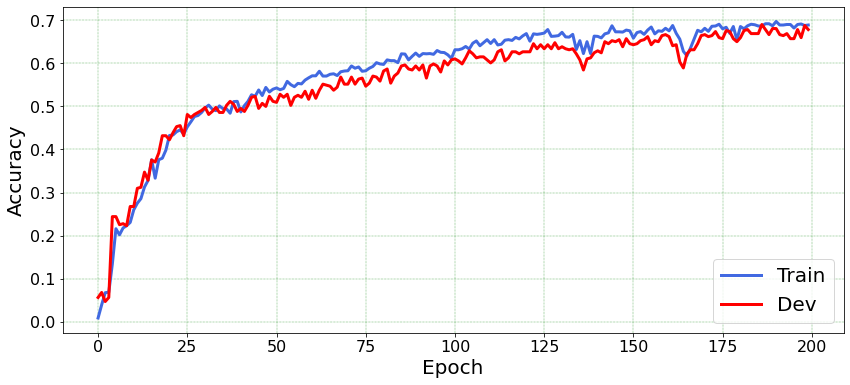

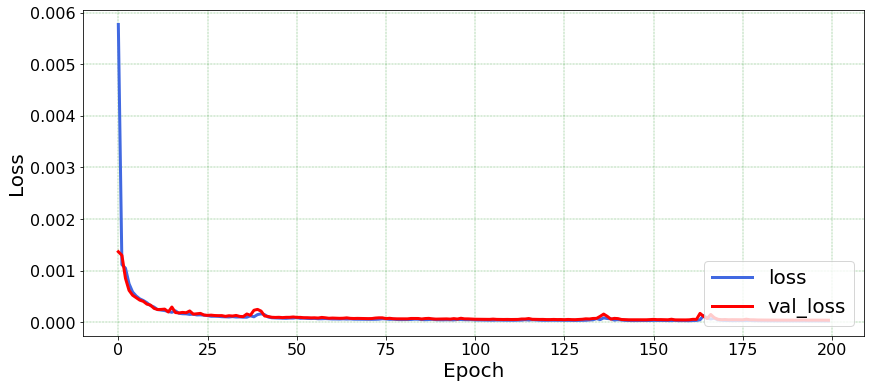

In [26]:
def printHistory(history):
       loss_curve = history.history["loss"]
       acc_curve = history.history["accuracy"]

       loss_val_curve = history.history["val_loss"]
       acc_val_curve = history.history["val_accuracy"]

       fig1, axs1 = plt.subplots(figsize=(14,6))
       axs1.plot(acc_curve, color='royalblue', alpha = 1, linewidth=3.0, label="Train")
       axs1.plot(acc_val_curve, color='red', alpha = 1, linewidth=3.0, label="Dev")
       axs1.set_ylabel('Accuracy', fontsize=20)
       axs1.set_xlabel('Epoch', fontsize=20)
       axs1.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
       
       fig2, axs2 = plt.subplots(figsize=(14,6))
       axs2.plot(loss_curve, color='royalblue', alpha = 1, linewidth=3.0, label="loss")
       axs2.plot(loss_val_curve, color='red', alpha = 1, linewidth=3.0, label="val_loss")
       axs2.set_ylabel('Loss', fontsize=20)
       axs2.set_xlabel('Epoch', fontsize=20)
       axs2.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
printHistory(history)

# 7. Evaluate the performance of the model

Load the model

In [32]:
model_1D = load_model("Conv1D")

Inference speed

In [45]:
import time

test_matrix = dataset3['signal_matrix']
#print("shape", signal_matrix.shape)
zeros = np.zeros((65,8,test_matrix.shape[2]))
#print("shape", zeros.shape)
test_matrix = np.concatenate((zeros, test_matrix), axis=0)
test_matrix = np.concatenate((test_matrix, zeros), axis=0).T
X = test_matrix.reshape(test_matrix.shape[0],-1)
X = normalize(X, axis=0, norm='max')
print(f"X = {X.shape}")
a = np.ones((1600, 1))

start = time.time()
for i in range(1000):
    predictions = model_1D.predict(X[i])
end = time.time()

print("Inference speed = "+(end-start)/1000+" s")

X = (1065, 1600)


ValueError: in user code:

    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\keras\layers\convolutional.py:249 call
        outputs = self._convolution_op(inputs, self.kernel)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:1131 convolution_v2
        return convolution_internal(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:1261 convolution_internal
        return op(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py:617 new_func
        return func(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\util\deprecation.py:617 new_func
        return func(*args, **kwargs)
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:2003 conv1d
        result = gen_nn_ops.conv2d(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:968 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:3561 _create_op_internal
        ret = Operation(
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    E:\Anaconda\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node model_2/conv1d_4/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](model_2/conv1d_4/conv1d/ExpandDims, model_2/conv1d_4/conv1d/ExpandDims_1)' with input shapes: [32,1,1,1], [1,2,1,64].
